# Carbon Emission Intesity in United Kingdom
    .. Using boxplots to identify carbon intensity for different hours of the data in the United Kingdom. 
    .. Data Source : https://api.carbonintensity.org.uk/

In [166]:
# Computational Packages
import pandas as pd
import numpy as np

# Visualisation Packages
import matplotlib.pyplot as plt

# Utility Packages
from urllib2 import urlopen
import json

In [167]:
# Ingesting data using CI API for all data between 01-Jan-2018 and 31-May-2018

days_in_month = {1:31, 2:28, 3:31, 4:30, 5:31}
start_template = '2018-key-01T00:00Z'
end_template = '2018-key-valT23:59Z'
base_url = 'https://api.carbonintensity.org.uk/intensity/%s/%s'
ci_pdFrame = pd.DataFrame()

for key in days_in_month.keys():
    period = (start_template.replace('key', '0%s' % key), \
    end_template.replace('key-val', '0%s-%s' % (key, days_in_month.get(key))))
    appended_url = base_url % period
    print ("Fetching data from URL = ", appended_url)
    fetchedResponse = urlopen(appended_url)
    temp_data = json.loads(fetchedResponse.read())['data']
    
    # Pandas Dataframe
    ci_frame_local = pd.DataFrame()
    ci_frame_local['intensity'] = [intensity['intensity']['actual'] for intensity in temp_data]
    ci_frame_local['timestamp'] = [pd.to_datetime(timestamp['from']) for timestamp in temp_data]
    ci_frame_local['classification'] = [timestamp['intensity']['index'] for classification in temp_data]
    ci_pdFrame = pd.concat([ci_pdFrame, ci_frame_local], axis=0) 

ci_pdFrame.set_index('timestamp', inplace=True)

('Fetching data from URL = ', 'https://api.carbonintensity.org.uk/intensity/2018-01-01T00:00Z/2018-01-31T23:59Z')
('Fetching data from URL = ', 'https://api.carbonintensity.org.uk/intensity/2018-02-01T00:00Z/2018-02-28T23:59Z')
('Fetching data from URL = ', 'https://api.carbonintensity.org.uk/intensity/2018-03-01T00:00Z/2018-03-31T23:59Z')
('Fetching data from URL = ', 'https://api.carbonintensity.org.uk/intensity/2018-04-01T00:00Z/2018-04-30T23:59Z')
('Fetching data from URL = ', 'https://api.carbonintensity.org.uk/intensity/2018-05-01T00:00Z/2018-05-31T23:59Z')


In [168]:
print ("\n -- Summary statistics of the ingested data --\n")
print (ci_pdFrame.describe())
print ("\n -- Information about the pandas frame --\n")
print (ci_pdFrame.info())


 -- Summary statistics of the ingested data --

         intensity
count  7243.000000
mean    261.521055
std      72.426902
min      99.000000
25%     210.000000
50%     256.000000
75%     312.000000
max     476.000000

 -- Information about the pandas frame --

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7248 entries, 2017-12-31 23:30:00 to 2018-05-31 23:00:00
Data columns (total 2 columns):
intensity         7243 non-null float64
classification    7248 non-null object
dtypes: float64(1), object(1)
memory usage: 169.9+ KB
None


## Understanding Different Intensity levels

In [169]:
low_intensity = ci_pdFrame [ci_pdFrame.classification == 'low']
moderate_intensity = ci_pdFrame [ci_pdFrame.classification == 'moderate']
high_intensity = ci_pdFrame [ci_pdFrame.classification == 'high']

In [170]:
# Low Intensity
low_intensity.head(10)

,intensity,classification
timestamp,,
2017-12-31 23:30:00,155.0,low
2018-01-01 00:00:00,157.0,low
2018-01-01 00:30:00,164.0,low
2018-01-01 01:00:00,171.0,low
2018-01-01 01:30:00,172.0,low
2018-01-01 02:00:00,172.0,low
2018-01-01 02:30:00,170.0,low
2018-01-01 03:00:00,172.0,low
2018-01-01 03:30:00,166.0,low


In [171]:
# Moderate Intensity
moderate_intensity.head(10)

,intensity,classification
timestamp,,
2018-02-28 23:30:00,339.0,moderate
2018-03-01 00:00:00,348.0,moderate
2018-03-01 00:30:00,354.0,moderate
2018-03-01 01:00:00,362.0,moderate
2018-03-01 01:30:00,350.0,moderate
2018-03-01 02:00:00,350.0,moderate
2018-03-01 02:30:00,347.0,moderate
2018-03-01 03:00:00,347.0,moderate
2018-03-01 03:30:00,339.0,moderate


In [172]:
# High Intensity
high_intensity.head(10)

,intensity,classification
timestamp,,
2018-01-31 23:30:00,137.0,high
2018-02-01 00:00:00,140.0,high
2018-02-01 00:30:00,147.0,high
2018-02-01 01:00:00,149.0,high
2018-02-01 01:30:00,148.0,high
2018-02-01 02:00:00,151.0,high
2018-02-01 02:30:00,152.0,high
2018-02-01 03:00:00,152.0,high
2018-02-01 03:30:00,149.0,high


In [173]:
# Calculating the high, low, and moderate threshold value of the carbon intensity

ci_pdFrame_grouped = ci_pdFrame.groupby(by='classification').min()

extreme_threshold_val = ci_pdFrame_grouped[ci_pdFrame_grouped.index == 'high'].values[0][0]
low_threshold_val = ci_pdFrame_grouped[ci_pdFrame_grouped.index=='low'].values[0][0]
moderate_threshold_val = ci_pdFrame_grouped[ci_pdFrame_grouped.index == 'moderate'].values[0][0]

print ("Low = %s, High = %s, Moderate=%s" % \
       (str(low_threshold_val), str(extreme_threshold_val), str(moderate_threshold_val)))

Low = 121.0, High = 99.0, Moderate=102.0


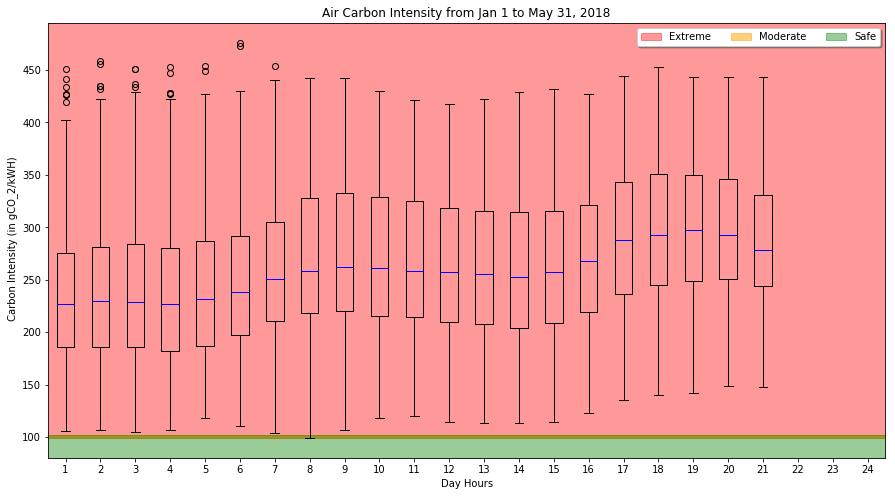

In [174]:
plt.figure (figsize=(15, 8))
ci_pdFrame_grouped_hourly = ci_pdFrame.groupby(ci_pdFrame.index.hour)

# Box plot visualisation
plt.boxplot([hg.intensity for _, hg in ci_pdFrame_grouped_hourly], medianprops = dict(color='blue'))
y_min, y_max = plt.ylim()


plt.fill_between (x=np.arange(26), y1=np.ones(26)*extreme_threshold_val, y2=np.ones(26)*y_max, 
                  color='red', alpha=.4, label='Extreme')
plt.fill_between (x=np.arange(26), y1=np.ones(26)*moderate_threshold_val, y2=np.ones(26)*extreme_threshold_val, 
                  color='orange', alpha=.5, label='Moderate')
plt.fill_between (x=np.arange(26), y1=np.ones(26)*moderate_threshold_val, y2=np.ones(26)*y_min, 
                  color='green', alpha=.4, label='Safe')

# Visualisation aesthetics
plt.ylim (y_min, y_max)
plt.title ('Air Carbon Intensity from Jan 1 to May 31, 2018')
plt.xlabel ('Day Hours')
plt.ylabel (' Carbon Intensity (in gCO_2/kWH)')
plt.legend (loc='best', ncol=3, shadow=True, fancybox=True)

# Displaying the plot
plt.show()